## Fashion MNIST
### MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.

In [1]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import time

#### Multi-Layer Perceptron (MLP)

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [3]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
start=time.time()
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))
print('spending time:', abs(start-time.time())/60,' [min]')

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5595 - acc: 0.7988 - val_loss: 0.3994 - val_acc: 0.8551
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3980 - acc: 0.8559 - val_loss: 0.4433 - val_acc: 0.8325
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3585 - acc: 0.8712 - val_loss: 0.3463 - val_acc: 0.8751
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3325 - acc: 0.8798 - val_loss: 0.3880 - val_acc: 0.8609
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3155 - acc: 0.8861 - val_loss: 0.3377 - val_acc: 0.8750
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3006 - acc: 0.8899 - val_loss: 0.3217 - val_acc: 0.8758
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2884 - acc: 0.8950 - val_loss: 0.3187 - val_acc: 0.8871
Epoch 8/10
782/782 [==============================] - 6s 8ms/step - loss: 0

In [5]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3475 - acc: 0.8780


#### Convolution Neural Network (CNN)

In [13]:
X_train_cnn=X_train.reshape(-1,28,28,1)
X_test_cnn=X_test.reshape(-1,28,28,1)

X_val_cnn=X_train_cnn[:10000]
partial_X_train_cnn=X_train_cnn[10000:]

In [28]:
cnn=models.Sequential()
cnn.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(2,2))
cnn.add(layers.Conv2D(32,(3,3),activation="relu"))
cnn.add(layers.MaxPool2D(2,2))
cnn.add(layers.Conv2D(32,(3,3),activation="relu"))


cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation='relu')) 
cnn.add(layers.Dense(512, activation='relu')) 
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(512, activation='relu')) 
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(10, activation='softmax')) 

cnn.compile(optimizer="nadam", loss="categorical_crossentropy",metrics=['acc'])

In [29]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)              

In [30]:
start= time.time()

val_cnn = cnn.fit(partial_X_train_cnn,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val_cnn, y_val))

print('spending time:', abs(start-time.time())/60,' [min]')

Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6002 - acc: 0.7776 - val_loss: 0.3965 - val_acc: 0.8546
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3622 - acc: 0.8694 - val_loss: 0.3246 - val_acc: 0.8789
Epoch 3/10
782/782 [==============================] - 11s 15ms/step - loss: 0.3092 - acc: 0.8879 - val_loss: 0.4213 - val_acc: 0.8444
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2802 - acc: 0.8998 - val_loss: 0.3374 - val_acc: 0.8835
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.2544 - acc: 0.9064 - val_loss: 0.2908 - val_acc: 0.8988
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2334 - acc: 0.9137 - val_loss: 0.2823 - val_acc: 0.9041
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2181 - acc: 0.9204 - val_loss: 0.2733 - val_acc: 0.9044
Epoch 8/10
782/782 [==============================] - 10s 12ms

In [31]:
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test_cnn,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3163 - acc: 0.9010


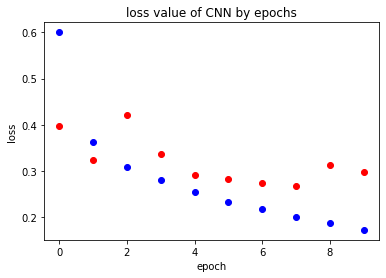

In [48]:
loss_cnn=val_cnn.history['loss']
val_loss_cnn=val_cnn.history['val_loss']

x=np.arange(len(loss_cnn))
plt.title('loss value of CNN by epochs')
plt.xlabel("epoch")
plt.ylabel('loss')
plt.plot(x,loss_cnn,'bo')
plt.plot(x,val_loss_cnn,'ro')
plt.show()


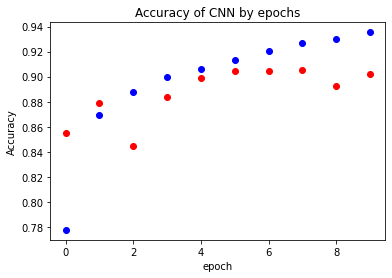

In [49]:
acc_cnn=val_cnn.history['acc']
val_acc_cnn=val_cnn.history['val_acc']

x=np.arange(len(acc_cnn))
plt.title('Accuracy of CNN by epochs')
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.plot(x,acc_cnn,'bo')
plt.plot(x,val_acc_cnn,'ro')
plt.show()

### Add padding & BatchNormalization

In [20]:
cnn2=models.Sequential()

cnn2.add(layers.Conv2D(32,(3,3),padding='same', activation='relu', input_shape=(28,28,1)))
cnn2.add(layers.Conv2D(64,(3,3),padding='same',activation="relu"))
cnn2.add(layers.BatchNormalization())
cnn2.add(layers.MaxPool2D(2,2))
cnn2.add(layers.Dropout(0.5))

cnn2.add(layers.Conv2D(128,(3,3),padding='same', activation='relu'))
cnn2.add(layers.BatchNormalization())
cnn2.add(layers.MaxPool2D(2,2))
cnn2.add(layers.Dropout(0.5))

cnn2.add(layers.Flatten())

cnn2.add(layers.Dense(128, activation='relu')) 
cnn2.add(layers.Dense(10, activation='softmax'))

cnn2.compile(optimizer="nadam", loss="categorical_crossentropy",metrics=['acc'])

In [21]:
cnn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)      

In [22]:
start=time.time()

val2_cnn = cnn2.fit(partial_X_train_cnn,partial_y_train,epochs=30, batch_size=64, validation_data=(X_val_cnn, y_val))

print('spending time:', abs(start-time.time())/60,' [min]')

Epoch 1/30
782/782 [==============================] - 13s 17ms/step - loss: 0.4964 - acc: 0.8240 - val_loss: 0.2997 - val_acc: 0.8921
Epoch 2/30
782/782 [==============================] - 13s 17ms/step - loss: 0.3122 - acc: 0.8857 - val_loss: 0.2950 - val_acc: 0.8924
Epoch 3/30
782/782 [==============================] - 12s 16ms/step - loss: 0.2722 - acc: 0.8978 - val_loss: 0.2843 - val_acc: 0.8979
Epoch 4/30
782/782 [==============================] - 13s 17ms/step - loss: 0.2491 - acc: 0.9073 - val_loss: 0.2461 - val_acc: 0.9090
Epoch 5/30
782/782 [==============================] - 13s 16ms/step - loss: 0.2316 - acc: 0.9142 - val_loss: 0.2264 - val_acc: 0.9194
Epoch 6/30
782/782 [==============================] - 13s 16ms/step - loss: 0.2144 - acc: 0.9204 - val_loss: 0.2283 - val_acc: 0.9169
Epoch 7/30
782/782 [==============================] - 14s 18ms/step - loss: 0.2058 - acc: 0.9233 - val_loss: 0.2378 - val_acc: 0.9194
Epoch 8/30
782/782 [==============================] - 13s 16ms

In [23]:
test_loss_cnn2, test_acc_cnn2 = cnn2.evaluate(X_test_cnn,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2583 - acc: 0.9330


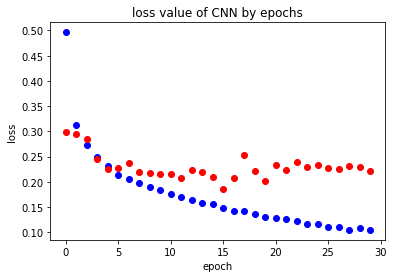

In [24]:
loss_cnn2=val2_cnn.history['loss']
val_loss_cnn2=val2_cnn.history['val_loss']

x=np.arange(len(loss_cnn2))
plt.title('loss value of CNN by epochs')
plt.xlabel("epoch")
plt.ylabel('loss')
plt.plot(x,loss_cnn2,'bo')
plt.plot(x,val_loss_cnn2,'ro')
plt.show()

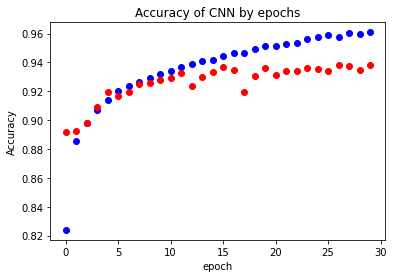

In [25]:
acc_cnn2=val2_cnn.history['acc']
val_acc_cnn2=val2_cnn.history['val_acc']

x=np.arange(len(acc_cnn2))
plt.title('Accuracy of CNN by epochs')
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.plot(x,acc_cnn2,'bo')
plt.plot(x,val_acc_cnn2,'ro')
plt.show()

| Model Architecture                                        |Epochs  | Batch size|  Trained Accuracy  |  Accuracy  | Time      |
|:---------------------------------------------------------:|:------:|:---------:|:------------------:|:----------:|:---------:|
|MLP                                                        | 10     | 64        | 90.27%             | 87.51%     |1.023 min  |
|CNN(32,(3,3))x3,MLP                                        | 10     | 64        | 93.16%             | 90.38%     |1.559 min  |
|CNN(32,(3,3),padding),MLP                                  | 10     | 64        | 96.12%             | 91.29%     |1.641 min  |
|(CNN,BN,Max)(64,128,256,(3,3)),DN(1024,512,DO)             | 10     | 64        | 96.73%             | 91.88%     |3.492 min  |
|(CNN,CNN(padding),BN,Max)(64,128,256,(3,3)),DN(1024,512,DO)| 10     | 64        | 96.50%             | 89.19%     |10.27 min  |
|(CNN,CNN(padding),BN,Max)(64,128,256,(3,3)),DN(1024,512,DO)| 30     | 64        | 99.30%             | 92.82%     |10.27 min  |
|(CNN,CNN(padding),BN,Max)(64,128,256,(3,3)),DN(1024,512,BN)| 10     | 64        | 96.66%             | 89.77%     |4.014 min  |
|(CNN,CNN(padding),BN,Max)(64,128,256,(3,3)),DN(1024,512,BN)| 30     | 64        | 99.50%             | 92.39%     |12.55 min  |
|(CNN,CNN(padding),DO,Max)(64,128,256,(3,3)),DN(1024,512,DO)| 10     | 64        | 90.72%             | 90.60%     |3.267 min  |
|(CNN,CNN(padding),DO,Max)(64,128,256,(3,3)),DN(1024,512,DO)| 30     | 64        | 92.06%             | 91.10%     |10.38 min  |
|(CNN,MAX,DO)(64,128,(3,3)),DN(128)                         | 30     | 64        | 95.78%             | 92.65%     |5.698 min  |
|(CNN(padding),MAX,BN,DO)(32,64,128,(3,3)),DN(128)          | 30     | 64        | 96.11%             | 93.07%     |6.631 min  |

BN:BatchNormalization, DO: Dropout, Max: Maxpooling, DN:Dense Net\
Computer Spec) CPU:i7-8550U GPU:GTX 1070Ti Ram:8GB

위 표를 보면, 층이 많다고 해서 정확도가 무작정 좋은 것은 아닌 것 같다. 실제로 단순한 모델도 좋은 성능을 낼 수 있었다. 그리고 기본적으로 padding을 하는 모델이 안한 모델보다 좋고, BatchNormalization을 하는 모델이 안한 모델보다 좋다. 그 대신에 더 많은 파라미터가 들어가서 더 많은 시간이 걸린다. 또한, BatchNormalization을 하면 Regularization도 되어서 Dropout을 하지 않아도 된다고는 하지만, Dropout만 한 것이 BatchNormalization만 한 것보다 성능이 더 좋았다. 그에 반해 MaxPooling은 데이터를 줄이는 대신에 정보의 손실이 일어나는 것인지 많이 할 수록 성능이 떨어지는 것 같았다. 결과적으로 무작정 layer 조합으로 모델을 찾기보다는 새로운 메커니즘 도입하는 것이 더 효과적으로 모델 성능을 향상 시킬 수 있는 방법인 것 같다.\
결과적으로 여러 조합을 시도해본 결과 최대 정확도 93%가 최고였다. 이는 의외로 단순한 구조이며, BatchNoarmalization, Dropout, padding 을 동시에 사용한 모델이었다. 해당 Dataset에 대해 검색해 본 결과 ResNet과 같은 다른 다른 layer를 이용하면 정확도 95% 이상이 나온다고 한다. 현재 CNN와 BatchNormalization을 사용한 모델로는 94%가 최대인 것 같다.

## Result

In [26]:
import pandas as pd

name=["T-Shirt","Trouser","Pullover",'Dress','Coat','Sandal','Shirt','Sneaker',"Bag","Ankle boot"]

df=pd.DataFrame({"Answer":np.argmax(y_test,axis=1),
                 "MLP":np.argmax(net.predict(X_test),axis=1),
                 "CNN":np.argmax(cnn2.predict(X_test_cnn),axis=1)})
df

,Answer,MLP,CNN
0,9,9,9
1,2,2,2
2,1,1,1
3,1,1,1
4,6,6,6
...,...,...,...
9995,9,9,9
9996,1,1,1
9997,8,8,8
9998,1,1,1


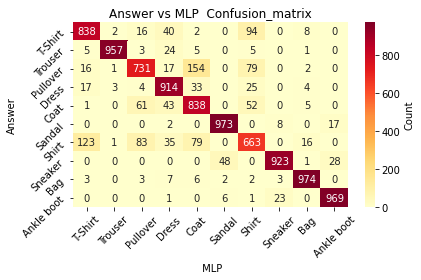

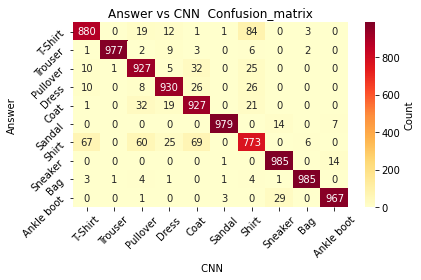

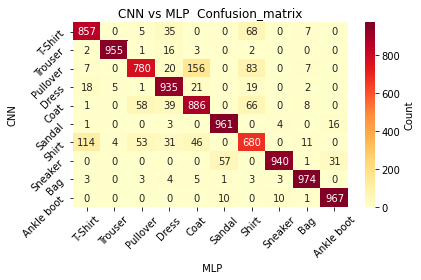

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_AM = confusion_matrix(df.Answer,df.MLP)
cm_AC = confusion_matrix(df.Answer,df.CNN)
cm_CM = confusion_matrix(df.CNN,df.MLP)

title=['Answer vs MLP','Answer vs CNN','CNN vs MLP']

for idx,cm in enumerate([cm_AM,cm_AC,cm_CM]):
    plt.figure(title[idx])
    plt.title(title[idx]+'  Confusion_matrix')
    sns.heatmap(cm, annot=True, fmt="d",cmap=plt.cm.YlOrRd,cbar_kws={'label': 'Count'})
    plt.xticks(np.arange(len(name))+0.5, name, rotation=45)
    plt.yticks(np.arange(len(name))+0.5, name, rotation=45)
    plt.ylabel(title[idx][:title[idx].find(' ')])
    plt.xlabel(title[idx][title[idx].rfind(' '):])
    plt.tight_layout()

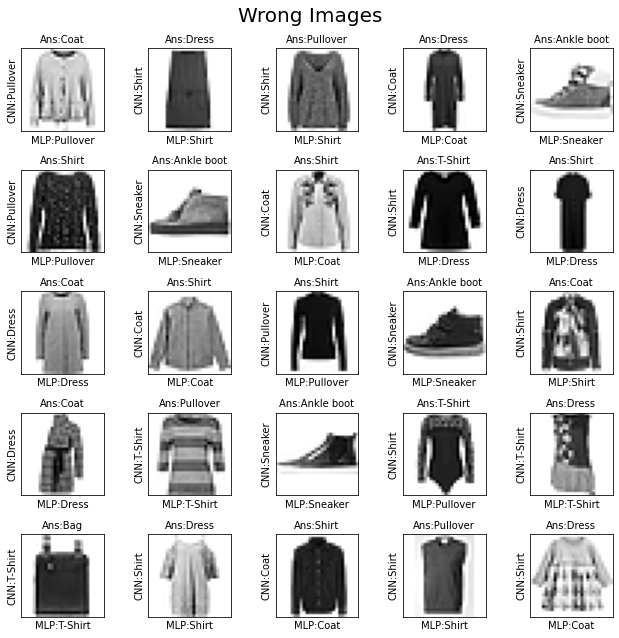

In [39]:
Wrong_arg=[]
for idx,val in enumerate((df.Answer!= df.MLP) & (df.Answer!=df.CNN)):
    if val ==1:
        Wrong_arg.append(idx)
Wrong_img=X_test_cnn[Wrong_arg]

num_show=5**2 #the amount of image that you wanna see. should be squre of nature number.
plt.figure(figsize=(int(np.sqrt(num_show)*1.8),int(np.sqrt(num_show)*1.8)))
for count,(arg,img) in enumerate(zip(Wrong_arg[:num_show],Wrong_img[:num_show])):
    plt.subplot(int(np.sqrt(num_show)),int(np.sqrt(num_show)),count+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.title('Ans:'+name[df.Answer[arg]],fontsize=10)
    plt.xlabel('MLP:'+name[df.MLP[arg]])#+'\n CNN:'+name[df.CNN[arg]])
    plt.ylabel('CNN:'+name[df.CNN[arg]])
    plt.imshow(img,cmap='binary')

plt.suptitle("Wrong Images",fontsize=20)
plt.tight_layout()
plt.show()

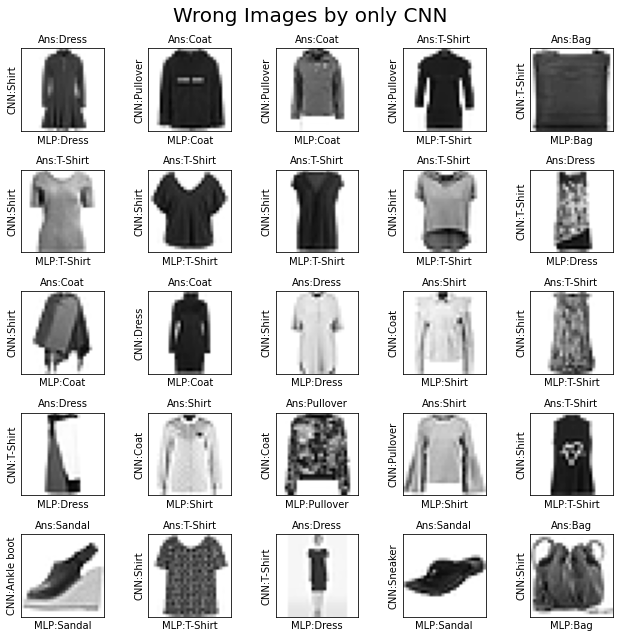

In [47]:
Wrong_arg=[]
for idx,val in enumerate((df.Answer== df.MLP) & (df.Answer!=df.CNN)):
    if val ==1:
        Wrong_arg.append(idx)
Wrong_img=X_test_cnn[Wrong_arg]

num_show=5**2 #the amount of image that you wanna see. should be squre of nature number.
plt.figure(figsize=(int(np.sqrt(num_show)*1.8),int(np.sqrt(num_show)*1.8)))
for count,(arg,img) in enumerate(zip(Wrong_arg[:num_show],Wrong_img[:num_show])):
    plt.subplot(int(np.sqrt(num_show)),int(np.sqrt(num_show)),count+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.title('Ans:'+name[df.Answer[arg]],fontsize=10)
    plt.xlabel('MLP:'+name[df.MLP[arg]])#+'\n CNN:'+name[df.CNN[arg]])
    plt.ylabel('CNN:'+name[df.CNN[arg]])
    plt.imshow(img,cmap='binary')

plt.suptitle("Wrong Images by only CNN",fontsize=20)
plt.tight_layout()
plt.show()

결과를 보면, Ankle boot를 제외하고 나머지 항목에 대해서 CNN의 정답률이 높고, Ankle boot도 비슷한 수준이며, Pullover와 Shirt에 대해서는 압도적으로 정답률이 늘었다. CNN과 MLP에서 모두 Shirt에 대한 정답률이 저조하며, shirt를 T-shirt로 햇갈리는 경우가 많았다.\
CNN와 MLP가 다른 경우도 꽤 있으며, 이는 CNN의 성능을 더 높일 수 있음을 시사한다. 즉, Ensemble method를 이용해서 더 많은 정답률을 달성할 수 있을지도 모른다. 그러나 GPU를 사용했음에도 불구하고 하나의 모델을 만드는 데 걸리는 시간이 5-10분 정도이기에, RandomForest처럼 많은 tree를 만들기는 힘들 것 같다.\
어떤 사진을 틀렸는지 보면, 이전 분류에서와 달리 사람이 보아도 햇갈릴만한 사진들이 많이 늘었다. 저번 분류에서는 사람이 분류했다고는 믿기지 않을 정도의 수준을 보이는 것이 많았지만, 지금은 사람이 햇갈렸다고 해도 믿을만한 수준이 되었다.